<a href="https://colab.research.google.com/github/ASGKJune/junebot/blob/main/StartUp_LinerReg_Assignment_ASGK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Profit Forecast of Start-Ups by using Linear Regression

## Challenge

* A venture capital firm in the United States wants to estimate the profit of a startup given certain factors.
* Startups typically invest in areas like R&D, Administration, and Marketing, and their performance can also vary depending on the State in which they operate.
* Your job as a data scientist is to figure out which factors contribute the most to startup profitability and provide data-driven insights for better investment decisions.

## Data description

* R&D Spend: Expenditure on research and development activities.
* Administration: Overheads and administrative costs incurred by the startup.
* Marketing Spend: Expenditure on marketing and advertising campaigns.
* State: The U.S. state where the startup operates (e.g., California, New York, Florida).
* Profit: Net profit of the startup (Target variable).

## Business Metrics

* Maximise startup profitability by identifying the most impactful areas of spending.
* Understand which investments (R&D, Administration, Marketing) yield the highest returns.
* Provide clear guidance for resource allocation to support sustainable business growth.

## Setup and Data Preparation:
- Import necessary libraries such as `pandas`, `matplotlib`, `seaborn`, and `scikit-learn`.  
- Load the dataset for regression analysis.  
- Conduct exploratory data analysis (EDA) to understand the dataset.  
- Preprocess the data by handling missing values, encoding categorical variables, and normalizing/standardizing features if needed.

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# Reading the file

df = pd.read_csv('50_Startups.csv')

In [ ]:
# Information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
# Checking for Null values

df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
# Checking for duplicates

duplicated = df[df.duplicated()]
print(duplicated)

Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, State, Profit]
Index: []


In [ ]:
# Having the statistical insight of the dataset

df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


* Insights:
* Minimum for both Marketing Spend and R&D Spend is 0.

In [ ]:
# Removing categorical data and finding out the coefficient of the numerical data.

df_numerical = df.select_dtypes(include=np.number)
df_numerical.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


* Insights:
* Marketing Spend seems to be significantly impacting Profit.
* R&D Spend also seems to be significantly impacting Profit.
* Further, Marketing Spend and R&D Spend seems to be significantly correlated.

In [ ]:
# Checking the categorical column

df_categorical = df.select_dtypes(include='object')
print(df_categorical)

         State
0     New York
1   California
2      Florida
3     New York
4      Florida
5     New York
6   California
7      Florida
8     New York
9   California
10     Florida
11  California
12     Florida
13  California
14     Florida
15    New York
16  California
17    New York
18     Florida
19    New York
20  California
21    New York
22     Florida
23     Florida
24    New York
25  California
26     Florida
27    New York
28     Florida
29    New York
30     Florida
31    New York
32  California
33     Florida
34  California
35    New York
36     Florida
37  California
38    New York
39  California
40  California
41     Florida
42  California
43    New York
44  California
45    New York
46     Florida
47  California
48    New York
49  California


In [ ]:
# Converting the categorical column into numerical.

pd.get_dummies(df_categorical)

,State_California,State_Florida,State_New York
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,False,True,False
5,False,False,True
6,True,False,False
7,False,True,False
8,False,False,True
9,True,False,False


In [ ]:
df_encoded = pd.get_dummies(df_categorical)
print(df_encoded)

    State_California  State_Florida  State_New York
0              False          False            True
1               True          False           False
2              False           True           False
3              False          False            True
4              False           True           False
5              False          False            True
6               True          False           False
7              False           True           False
8              False          False            True
9               True          False           False
10             False           True           False
11              True          False           False
12             False           True           False
13              True          False           False
14             False           True           False
15             False          False            True
16              True          False           False
17             False          False            True
18          

# 2. Simple Linear Regression:
- Select one independent variable (predictor) and one dependent variable (response).  
- Train a Simple Linear Regression model using the selected variables.  
- Visualize the regression line on a scatter plot to show the relationship between the predictor and response variable.

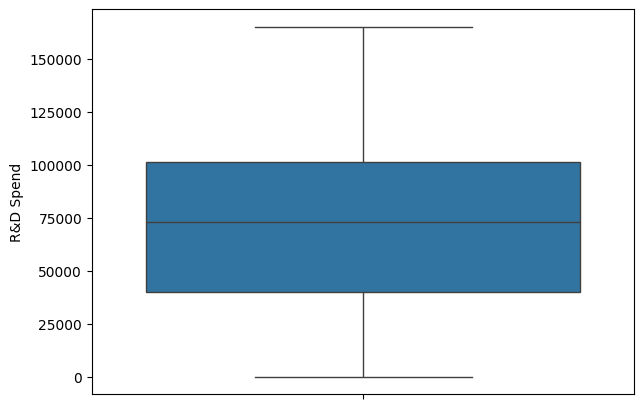

In [ ]:
# We will now make boxplot visualization for each column to check whether outliers.

# Boxplot for R&D Spend

fig = plt.figure(figsize=(7,5))
sns.boxplot(df['R&D Spend'])
plt.show()

* From the above boxplot, we can infer that there are no outliers in the R&D Spend.

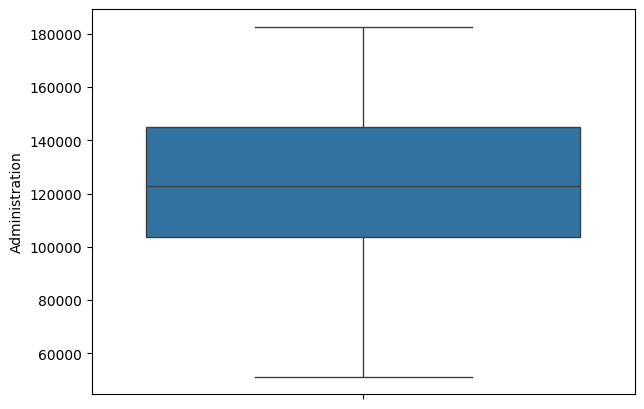

In [ ]:
# Boxplot for Administration

fig = plt.figure(figsize=(7,5))
sns.boxplot(df['Administration'])
plt.show()

* From the above boxplot, we can infer that there are no outliers in Administration.

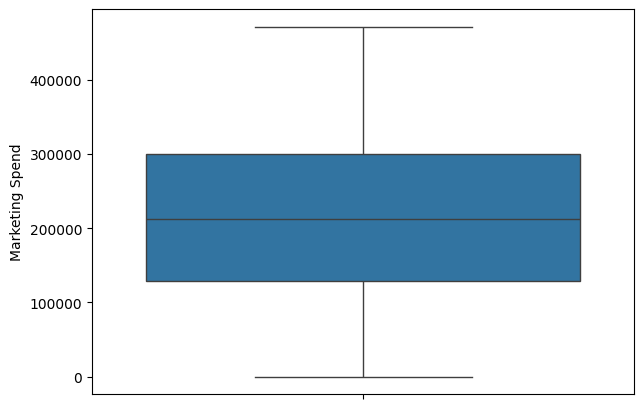

In [ ]:
# Boxplot for Marketing Spend

fig = plt.figure(figsize=(7,5))
sns.boxplot(df['Marketing Spend'])
plt.show()

* From the above boxplot, we can infer that there are no outliers in Marketing Spend.

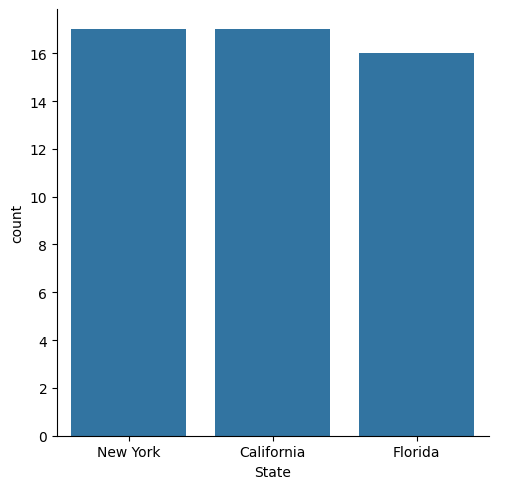

In [ ]:
# Working with categorical data
sns.catplot(df, x='State', kind='count')

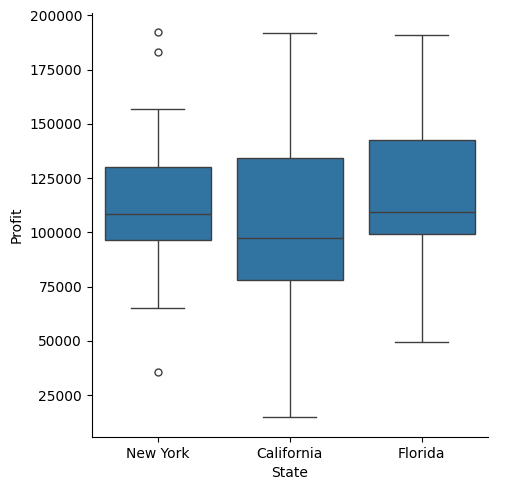

In [ ]:
# Checking the categorical feature with a numerical feature

sns.catplot(df, x='State', y='Profit', kind='box')



* From the above graph we can infer that there are outliers in the profit earned from the New York region start-ups.

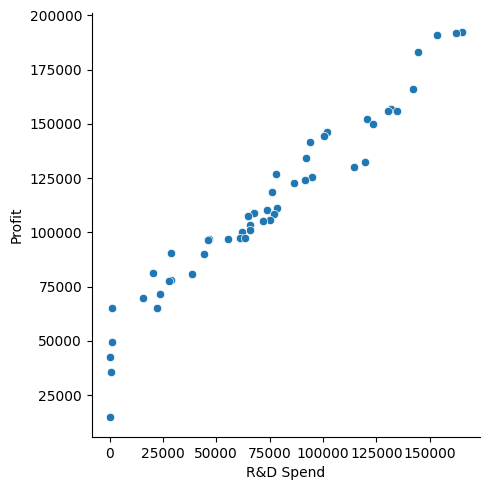

In [ ]:
# Checking the relationship between two numerical features, R&D Spend and Profit.

sns.relplot(df, x='R&D Spend', y='Profit')

* Based on the above graph we can infer that a strong linear relationship exists between R&D Spend and Profit.

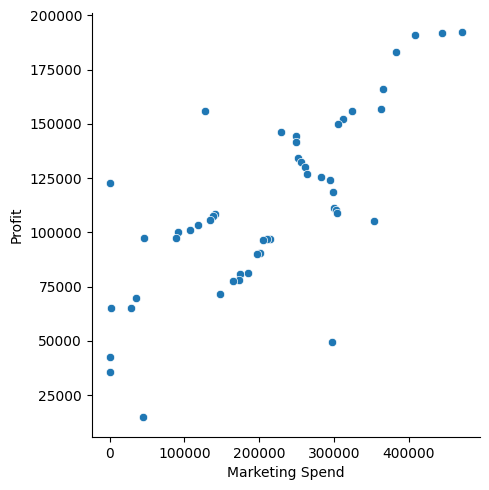

In [ ]:
# Checking the relationship between two numerical features, Marketing Spend and Profit.

sns.relplot(df, x='Marketing Spend', y='Profit')

* From the above graph we can infer that there exists a somewhat linear relationship between Marketing Spend and Profit.

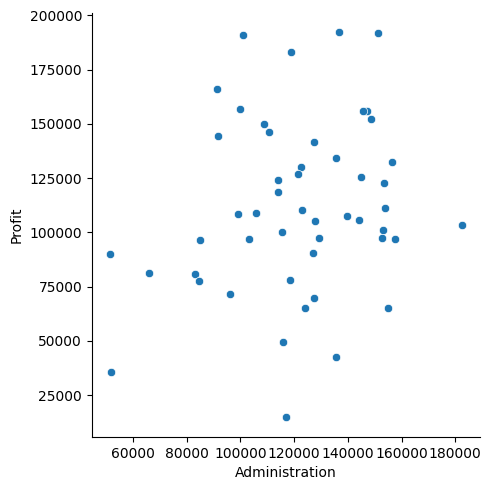

In [ ]:
# Checking the relationship between two numerical features, Administration and Profit.

sns.relplot(df, x='Administration', y='Profit')

* Based on the above graph we can infer that there is no linear relationship between Administration and Profit.

In [ ]:
# 1. Calculate Spearman correlation matrix
spearman_corr = df_numerical.corr(method='spearman')

print("Spearman Rank Correlation Matrix:")
print(spearman_corr)

Spearman Rank Correlation Matrix:
                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.192226         0.709905  0.989844
Administration    0.192226        1.000000        -0.096096  0.168595
Marketing Spend   0.709905       -0.096096         1.000000  0.721366
Profit            0.989844        0.168595         0.721366  1.000000


In [ ]:
# 2. If you only want correlation of independent variables with dependent variable 'y':
corr_with_Profit = df_numerical.corr(method='spearman')["Profit"].sort_values(ascending=False)
print("\nSpearman correlation of all features with target (Profit):")
print(corr_with_Profit)


Spearman correlation of all features with target (Profit):
Profit             1.000000
R&D Spend          0.989844
Marketing Spend    0.721366
Administration     0.168595
Name: Profit, dtype: float64


In [ ]:
# Split the population data

from sklearn.model_selection import train_test_split

# Combine numerical and encoded categorical features
df_combined = pd.concat([df_numerical.drop('Profit', axis=1), df_encoded], axis=1)

X = df_combined
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

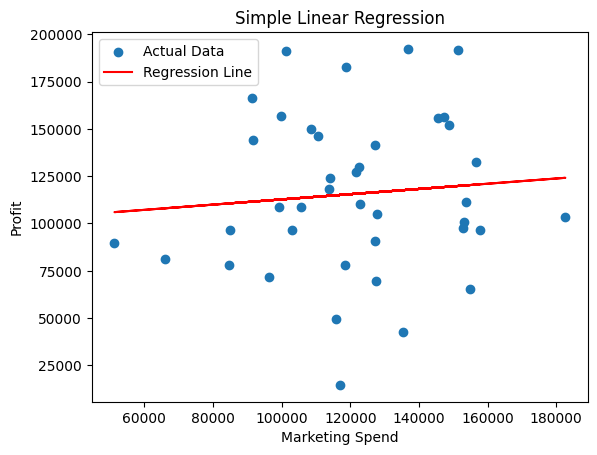

In [ ]:
# Visualize the regression line on a scatter plot to show the relationship between the predictor (R&D Spend) and response variable (Profit)

plt.scatter(X_simple, y_simple, label='Actual Data')
plt.plot(X_simple, reg_simple.predict(X_simple), color='red', label='Regression Line')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Select 'Marketing Spend' as the independent variable for Simple Linear Regression
X_simple = X_train[['Marketing Spend']]
y_simple = y_train

In [ ]:
# Train a Simple Linear Regression model using the selected variables.

# For Simple Linear Regression, let's select 'Marketing Spend' as the independent variable
X_simple = X_train[['Marketing Spend']]
y_simple = y_train

reg_simple = LinearRegression().fit(X_simple, y_simple)
train_score_simple = reg_simple.score(X_simple, y_simple)
test_score_simple = reg_simple.score(X_test[['Marketing Spend']], y_test)

print(f"Training score for Simple Linear Regression: {train_score_simple}")
print(f"Test score for Simple Linear Regression: {test_score_simple}")

Training score for Simple Linear Regression: 0.5986933402198811
Test score for Simple Linear Regression: -0.11205578997827947


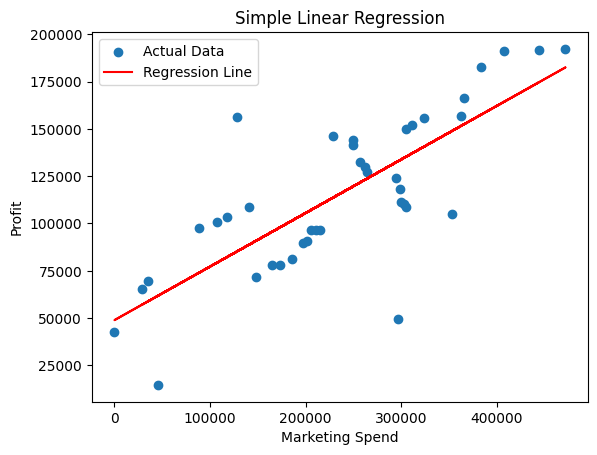

In [ ]:
# Visualize the regression line on a scatter plot to show the relationship between the predictor (Marketing Spend) and response variable (Profit)

plt.scatter(X_simple, y_simple, label='Actual Data')
plt.plot(X_simple, reg_simple.predict(X_simple), color='red', label='Regression Line')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Train a Simple Linear Regression model using the selected variables.

# For Simple Linear Regression, let's select 'Administration' as the independent variable
X_simple = X_train[['Administration']]
y_simple = y_train

reg_simple = LinearRegression().fit(X_simple, y_simple)
train_score_simple = reg_simple.score(X_simple, y_simple)
test_score_simple = reg_simple.score(X_test[['Administration']], y_test)

print(f"Training score for Simple Linear Regression: {train_score_simple}")
print(f"Test score for Simple Linear Regression: {test_score_simple}")

Training score for Simple Linear Regression: 0.008142400627907831
Test score for Simple Linear Regression: -0.19108803250893636


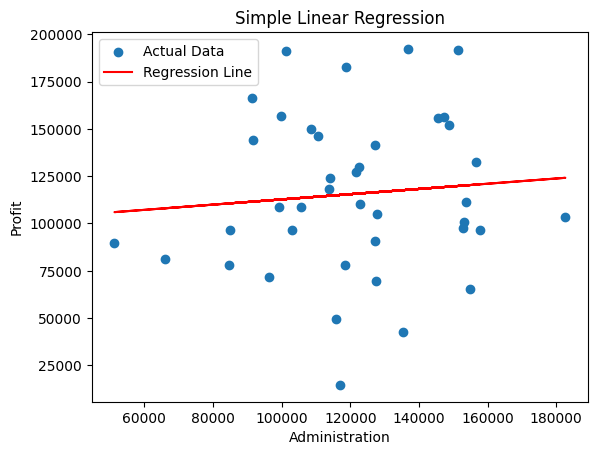

In [ ]:
# Visualize the regression line on a scatter plot to show the relationship between the predictor (Administration) and response variable (Profit)

plt.scatter(X_simple, y_simple, label='Actual Data')
plt.plot(X_simple, reg_simple.predict(X_simple), color='red', label='Regression Line')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

3. Multiple Linear Regression:
- Select multiple independent variables (predictors) and one dependent variable (response).  
- Train a Multiple Linear Regression model using the selected features.  
- Analyze the regression coefficients to understand the impact of each predictor on the response variable.

In [ ]:
# Train a Multiple Linear Regression model
X_multiple = X_train[['Marketing Spend', 'R&D Spend', 'Administration']]
y_multiple = y_train

reg_multiple = LinearRegression().fit(X_multiple, y_multiple)


# Considering Marketing Spend, R&D Spend and Admistration as the multiple independent variables (predictors) and Profit as the one dependent variable (response).
# Coefficients
feature_names = X_multiple.columns

coefs = pd.DataFrame(
    reg_multiple.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

display(coefs)

,Coefficients
Marketing Spend,0.031242
R&D Spend,0.803779
Administration,-0.067929


In [ ]:
# Writing the OLS Regression Code
import statsmodels.api as sm

# Assuming df_combined is your dataframe with all features and target
X = df_combined
y = df['Profit']

# Convert boolean columns to integers (0s and 1s)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Add a constant to the predictor variables for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           1.34e-27
Time:                        15:01:37   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.763e+04   5073.636  

In [ ]:
# Since there is a suggestion of multicollinearity, we are looking at Variance Inflation Factor (VIF) for the predictors.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()

# Drop one column from each set of one-hot encoded variables to avoid perfect multicollinearity
X_vif = X.drop(['State_New York', 'const'], axis=1)


vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factors:")
display(vif_data)


Variance Inflation Factors:


,feature,VIF
0,R&D Spend,8.604798
1,Administration,5.573480
2,Marketing Spend,8.122776
3,State_California,1.891418
4,State_Florida,1.957715


4. Model Evaluation:
- Calculate evaluation metrics for both Simple and Multiple Linear Regression models:  
  - Mean Squared Error (MSE)  
  - Mean Absolute Error (MAE)  
  - R-squared (R²)  
  - Adjusted R-squared (Adjusted R²)  
- Compare the performance of both models and justify the results.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test data using the multiple linear regression model
# Select only the features used during training
X_test_multiple = X_test[['Marketing Spend', 'R&D Spend', 'Administration']]
y_pred = reg_multiple.predict(X_test_multiple)

# Calculate evaluation metrics for Multiple Linear Regression
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) for Multiple Linear Regression: {mse}")
print(f"Mean Absolute Error (MAE) for Multiple Linear Regression: {mae}")
print(f"R-squared (R2) for Multiple Linear Regression: {r2}")

# Calculate Adjusted R-squared for Multiple Linear Regression
# Adjusted R-squared = 1 - [(1-R2) * (n-1) / (n-k-1)]
n = len(y_test)  # number of observations
k = X_test_multiple.shape[1]  # number of predictors used in the model
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f"Adjusted R-squared for Multiple Linear Regression: {adjusted_r2}")

Mean Squared Error (MSE) for Multiple Linear Regression: 80926321.22295162
Mean Absolute Error (MAE) for Multiple Linear Regression: 6979.152252370399
R-squared (R2) for Multiple Linear Regression: 0.900065308303732
Adjusted R-squared for Multiple Linear Regression: 0.850097962455598


In [ ]:
# Predict on the test data using the simple linear regression model

y_pred_simple = reg_simple.predict(X_test[["Administration"]])

# Calculate evaluation metrics for Simple Linear Regression
# --- Evaluation Metrics ---
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# R-squared
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared
n = X_test.shape[0]   # number of observations
p = X_test.shape[1]   # number of predictors (here = 1)
adj_r2 = 1 - (1-r2) * (n-1)/(n-p-1)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)

Mean Squared Error (MSE): 80926321.22295162
Mean Absolute Error (MAE): 6979.152252370399
R-squared (R2): 0.900065308303732
Adjusted R-squared: 0.700195924911196


In [ ]:
print(df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr())

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


* From the above analysis with the simple and multiple regression models, since there is not much difference in the evaluation metrics such as MAE, MSE, R2 and Adjusted R2, we can conclude the following:

* Simple regression (R&D Spend → Profit) already captures almost everything.

* Multiple regression (R&D, Administration, Marketing → Profit) doesn’t add much new information.

* Therefore, MSE, MAE, R², Adjusted R² come out the same (or very close).

5. Residual Analysis:
- Perform residual analysis to validate the assumptions of Linear Regression:  
  - Linearity  
  - Homoscedasticity (constant variance)  
  - Independence of errors  
  - Normality of residuals

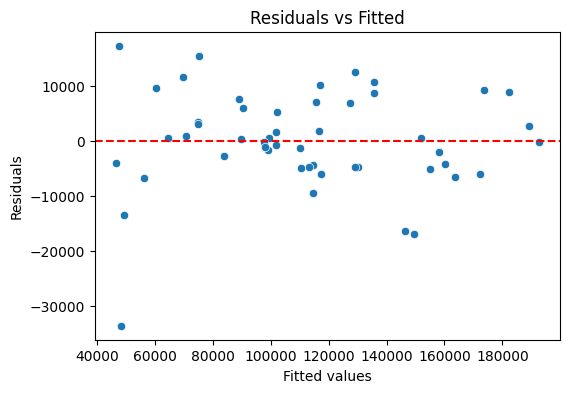

In [ ]:
# Example: Multiple regression with R&D, Administration, Marketing
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

# Fit using statsmodels for residual analysis
X_sm = sm.add_constant(X)  # adds intercept
model = sm.OLS(y, X_sm).fit()
residuals = model.resid
fitted = model.fittedvalues

# 1. Residuals vs Fitted (Linearity & Homoscedasticity)
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

* How to Interpret the Residuals vs Fitted chart:
* Should be randomly scattered around zero (no pattern).
* Curved pattern → nonlinearity.
* Funnel shape → heteroscedasticity.
* As the fitted ine is linear, it emphasises linear relationship with homoskedasticity.

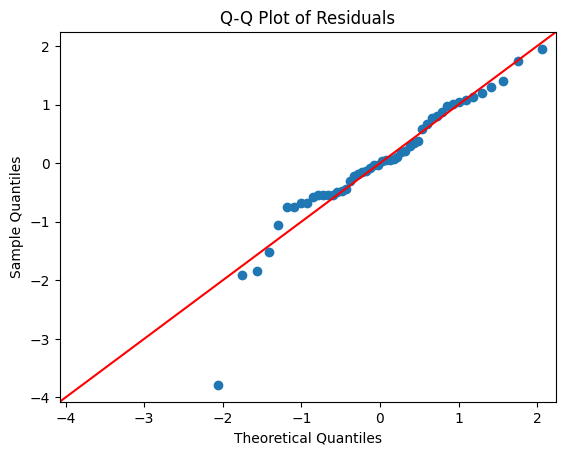

In [ ]:
# 2. Q-Q Plot (Normality of residuals)
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

* How to interpret the Q-Q Plot:
* Points should lie close to the 45° line.
* Deviations at ends → residuals not normally distributed.
* The points are lying majorly close to the 45° line and there are deviations at the ends, implying that the residuals are normally distributed.

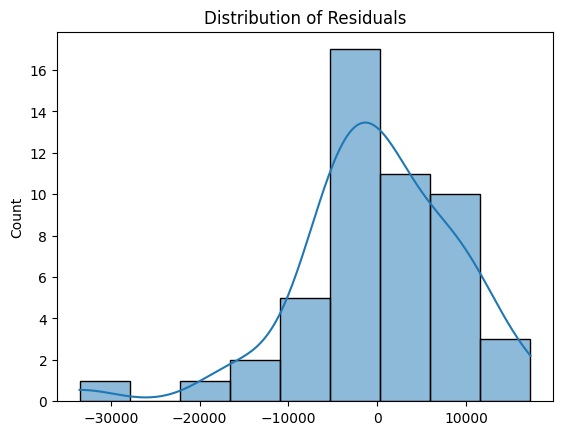

In [ ]:
# 3. Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

* How to interpret Histogram:
* Residuals should look bell-shaped (approx normal).
* The residuals curve looks bell-shaped and skewed towards the right.

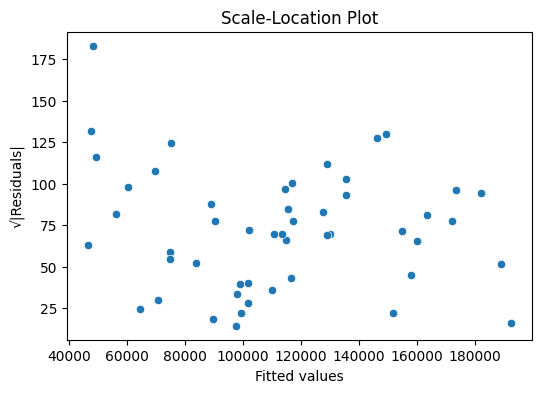

In [ ]:
# 4. Scale-Location plot (Homoscedasticity check)
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=np.sqrt(np.abs(residuals)))
plt.xlabel("Fitted values")
plt.ylabel("√|Residuals|")
plt.title("Scale-Location Plot")
plt.show()

* How to interpre Scale-Location Plott:
* Points should be randomly spread.
* Increasing spread → heteroscedasticity.

* As the points are randomly spread and have an increasing spread, thereby ensuring heteroskedasticity.

6. Model Optimization:
Identify and remove irrelevant or highly correlated predictors to improve the model's performance.
Assess the impact of feature selection on the R-squared and Adjusted R-squared values.

In [ ]:
# We have observed that the VIF is quite high for R&D Spend and Marketing Spend.

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming df_combined is your dataframe with all features and target
X = df_combined.drop('State_New York', axis=1)  # Drop one state column to avoid perfect multicollinearity
y = df['Profit']

# Convert boolean columns to integers (0s and 1s)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Add constant
X = sm.add_constant(X)

# ----- Function to calculate VIF -----
def calculate_vif(X, thresh=8.0):
    """Iteratively remove features with VIF > threshold."""
    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(X.shape[1])]

        max_vif = vif_data["VIF"].max()
        if max_vif > thresh:
            drop_feature = vif_data.loc[vif_data["VIF"].idxmax(), "feature"]
            if drop_feature == "const":   # never drop intercept
                print("High VIF in constant detected, keeping it.")
                break
            print(f"Dropping '{drop_feature}' with VIF={max_vif:.2f}")
            X = X.drop(columns=[drop_feature])
        else:
            break
    return X, vif_data

# ----- Run VIF reduction -----
X_reduced, final_vif = calculate_vif(X, thresh=8.0)

print("\nFinal VIF values after dropping high-VIF features:")
print(final_vif)

# ----- Fit model again -----
model = sm.OLS(y, X_reduced).fit()
print(model.summary())

High VIF in constant detected, keeping it.

Final VIF values after dropping high-VIF features:
            feature        VIF
0             const  27.126379
1         R&D Spend   2.495511
2    Administration   1.177766
3   Marketing Spend   2.416797
4  State_California   1.335061
5     State_Florida   1.361299
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 27 Sep 2025   Prob (F-statistic):           1.34e-27
Time:                        15:02:51   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                   

* By using RidgeCV or LassoCV in scikit-learn, the model is solving an optimization problem that modifies the classic Ordinary Least Squares (OLS) objective.
* Ridge → shrinks all coefficients, but keeps them (good for multicollinearity).
Lasso → shrinks some coefficients to exactly zero (good for feature selection).
Elastic Net (extra) → combines both L1 + L2.

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

# RidgeCV with cross-validation alphas
ridge_cv = RidgeCV(alphas=[0.1, 1, 10, 100], cv=5)
ridge_cv.fit(X_train, y_train)
print("Best alpha (Ridge):", ridge_cv.alpha_)

# LassoCV with automatic alpha selection
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)
print("Best alpha (Lasso):", lasso_cv.alpha_)

Best alpha (Ridge): 100.0
Best alpha (Lasso): 10.0


In [ ]:
print("Ridge Coefficients:", ridge_cv.coef_)
print("Lasso Coefficients:", lasso_cv.coef_)

Ridge Coefficients: [ 8.03992532e-01 -6.80250092e-02  3.10854749e-02 -3.40087030e+01
  7.12294950e+01 -3.72207920e+01]
Lasso Coefficients: [ 8.05540639e-01 -6.87412329e-02  2.99284461e-02 -0.00000000e+00
  8.88574259e+02 -0.00000000e+00]


In [ ]:
# Ridge Regression with Cross-Validation


ridge = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Lasso Regression with Cross-Validation


lasso = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5, max_iter=5000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [ ]:
#Evaluation Function

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, LassoCV # Import LinearRegression and LassoCV
import numpy as np # Import numpy

def evaluate(y_true, y_pred):
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

# Train a simple linear regression model for evaluation
reg = LinearRegression().fit(X_train, y_train)

# Lasso Regression with Cross-Validation
lasso = LassoCV(alphas=np.logspace(-3, 3, 100), cv=5, max_iter=5000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


# Predict on the test data using the simple linear regression model
y_pred_lr = reg.predict(X_test)

results = {
    "Linear Regression": evaluate(y_test, y_pred_lr), # This evaluates the simple linear regression model trained above
    "Ridge Regression": evaluate(y_test, y_pred_ridge),
    "Lasso Regression": evaluate(y_test, y_pred_lasso)
}

print("Model Evaluation Results:")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

Model Evaluation Results:

Linear Regression:
MSE: 82010363.0442
MAE: 6961.4778
R2: 0.8987

Ridge Regression:
MSE: 80938190.4945
MAE: 6978.9276
R2: 0.9001

Lasso Regression:
MSE: 80925843.4293
MAE: 6979.1342
R2: 0.9001


* 1. Ridge: Best α = 100.0

* This means the cross-validation found that a strong penalty (α = 100) gave the best performance.
* Likely, the predictors (R&D, Administration, Marketing, State dummies) may have some multicollinearity or weak predictors.
* Ridge works best with a stronger penalty when irrelevant predictors exist, because it shrinks them closer to zero but keeps them in the model.
* Interpretation:
* Ridge kept all predictors, but forced their coefficients to be smaller → reducing overfitting.
* Profit is still largely explained by R&D Spend, but Ridge ensures Admin/Marketing don’t “mess up” predictions.

2. Lasso: Best α = 10.0
* A moderate α = 10 gave the best performance for Lasso.
* Since Lasso uses an L1 penalty, it tries to set some coefficients exactly to zero.
* Interpretation:
* With α = 10, Lasso probably dropped Administration (because we saw earlier it had no relationship with Profit).
* It may have also shrunk Marketing towards zero (depending on its actual correlation).

* End result: Lasso is acting as a feature selector, leaving only R&D (and maybe State, Marketing depending on your dataset).

* Key Insights
* Ridge picked α = 100 → model benefits from stronger shrinkage, reducing coefficient variance.
* Lasso picked α = 10 → model benefits from feature selection, dropping irrelevant predictors.
* Both methods confirm that R&D Spend is the dominant predictor of Profit in the startup dataset.